Sub-class FunctionWithGui
=========================

Introduction
------------

By subclassing `FunctionWithGui`, you can fully customize the behavior of the function:
- you can add a GUI for the internal state of the function (e.g. displaying a live plot of a sound signal)
- you can add a heartbeat function that will be called at each frame (e.g. get the latest data from a sensor)
- you can save and load the internal GUI presentation options to/from a JSON file (e.g. to save the layout of a plot)

Example: Camera & Internal State
--------------------------------

[fiatlight.fiat_kits.fiat_image.CameraImageProviderGui](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_image/camera_image_provider.py)
is a good example of a custom FunctionWithGui class.

You can see it in action below:

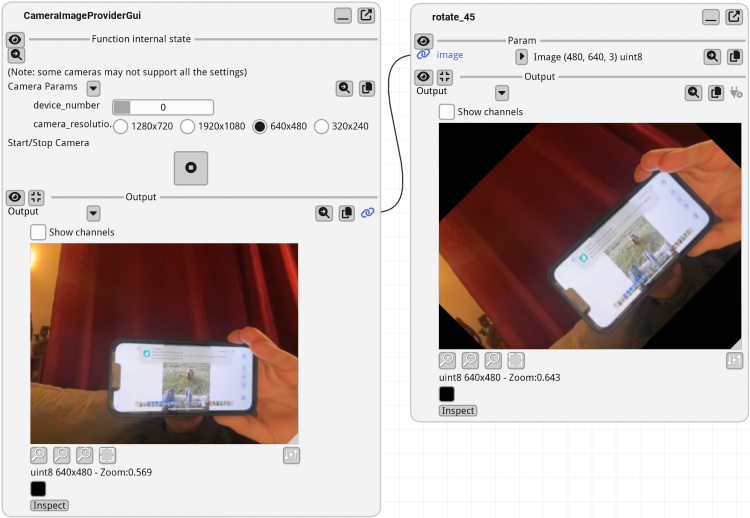

In [2]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import CameraImageProviderGui, ImageU8_3
import cv2

def rotate_45(image: ImageU8_3) -> ImageU8_3:
    transform = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), 45, 1)
    return cv2.warpAffine(image, transform, (image.shape[1], image.shape[0]))  # type: ignore

camera_provider_gui = CameraImageProviderGui()
fl.run([camera_provider_gui, rotate_45], app_name="Camera provider with rotation")

**Commented extracts of [camera_image_provider.py](../fiat_kits/fiat_image/camera_image_provider.py)**

Look at the `CameraImageProviderGui` class that extends `FunctionWithGui`:

> Notes:
> * `CameraImageProviderGui` der uses a `CameraImageProvider` class that provides images from a camera.
> * `CameraParams` contains the state of the camera (device number, brightness, contrast, etc.).
    >    This state is serialized. As it is as a Pydantic model, a GUI for it is automatically created by Fiatlight,
    >    and its state is serialized.

**CameraImageProviderGui (a descendant of FunctionWithGui)**:

In [ ]:
from fiatlight.fiat_notebook import look_at_code
%look_at_python_code
fiatlight.fiat_kits.fiat_image.camera_image_provider.CameraImageProviderGui

**CameraParams (serialized internal state)**:

In [3]:
import fiatlight as fl
from enum import Enum
from pydantic import BaseModel
import cv2

class CameraResolution(Enum):
    HD_1280_720 = [1280, 720]
    FULL_HD_1920_1080 = [1920, 1080]
    VGA_640_480 = [640, 480]

@fl.base_model_with_gui_registration(device_number__range= (0, 5), brightness__range= (0, 1), contrast__range= (0, 1))
class CameraParams(BaseModel):
    device_number: int = 0
    brightness: float = 0.5
    contrast: float = 0.5
    camera_resolution: CameraResolution = CameraResolution.VGA_640_480


class CameraImageProvider:
    '''A class that provides images from a camera'''
    camera_params: CameraParams
    cv_cap: cv2.VideoCapture | None = None
    ...